Source: https://www.kaggle.com/code/jaymineshkumarpatel/traffic-prediction#Data-Exploration

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta, date
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [7]:
# Read CSV file into a DataFrame
df = pd.read_csv('/content/traffic.csv')

# Print first few rows of the DataFrame
print(df.head())


              DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041


In [8]:
df.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [20]:
df = pd.read_csv('/content/traffic.csv', parse_dates=True, index_col='DateTime')
df.head()

,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041


In [21]:
df.tail()

,Junction,Vehicles,ID
DateTime,,,
2017-06-30 19:00:00,4,11,20170630194
2017-06-30 20:00:00,4,30,20170630204
2017-06-30 21:00:00,4,16,20170630214
2017-06-30 22:00:00,4,22,20170630224
2017-06-30 23:00:00,4,12,20170630234


In [22]:
# extract year from date
df['Year'] = pd.Series(df.index).apply(lambda x: x.year).to_list()

# extract month from date
df['Month'] = pd.Series(df.index).apply(lambda x: x.month).to_list()

# extract day from date
df['Day'] = pd.Series(df.index).apply(lambda x: x.day).to_list()

# extract hour from date
df['Hour'] = pd.Series(df.index).apply(lambda x: x.hour).to_list()

In [23]:
df.drop('ID', axis=1, inplace=True)
df.head()

,Junction,Vehicles,Year,Month,Day,Hour
DateTime,,,,,,
2015-11-01 00:00:00,1,15,2015,11,1,0
2015-11-01 01:00:00,1,13,2015,11,1,1
2015-11-01 02:00:00,1,10,2015,11,1,2
2015-11-01 03:00:00,1,7,2015,11,1,3
2015-11-01 04:00:00,1,9,2015,11,1,4


In [24]:
def make_hist(junction=1):
    data = df[df['Junction'] == junction]
    f, ax = plt.subplots(figsize=(17, 5))
    ax = sns.histplot(data['Vehicles'], kde=True, stat='probability')
    ax.set_title(f'Plot show the distribution of data in junction {junction}')
    ax.grid(True, ls='-.', alpha=0.75)
    plt.show()

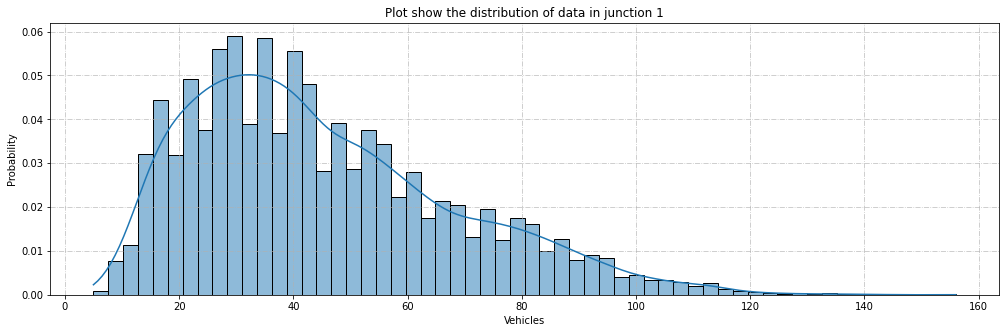

In [25]:
make_hist(1)

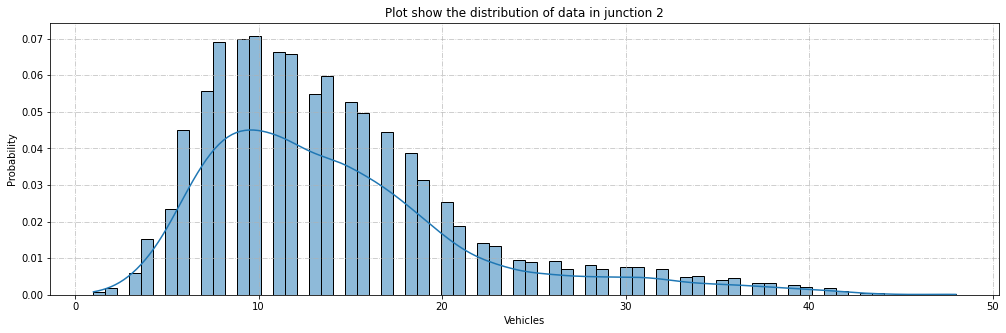

In [26]:
make_hist(2)

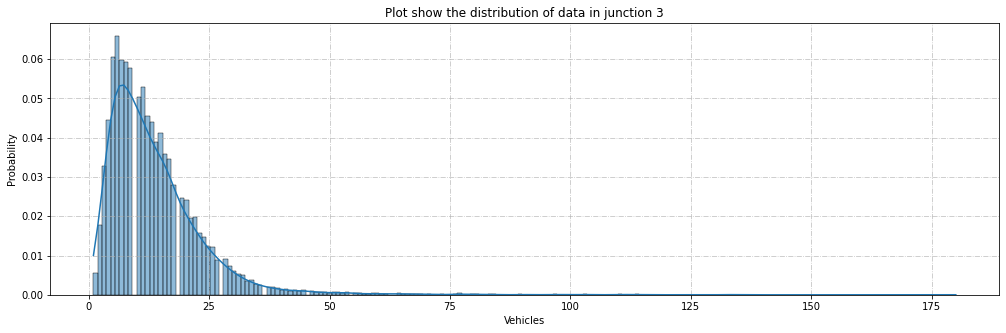

In [27]:
make_hist(3)

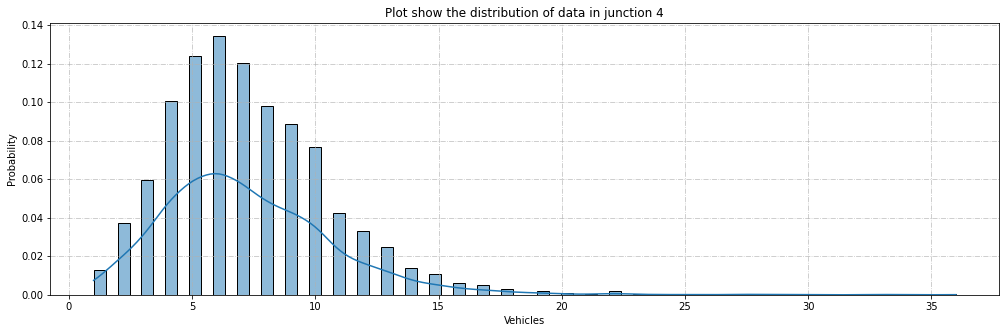

In [29]:
make_hist(4)

In [30]:
df.tail(1).Year[0]

2017

In [31]:
def make_time_series_plot(junction=1):
    f, ax = plt.subplots(figsize=(17, 5))
    data=df[df.Junction == junction]
    ax = sns.lineplot(data=data, y='Vehicles', x='DateTime', ax=ax)
    start = data.head(1)
    end = data.tail(1)
    ax.set_title(f'Plot show amounts of Vehicles in junction {junction} from {start.Month[0]}-{start.Year[0]} to {end.Month[0]}-{end.Year[0]}', fontsize=15)
    ax.grid(True, ls='-.', alpha=0.75)
    plt.show()

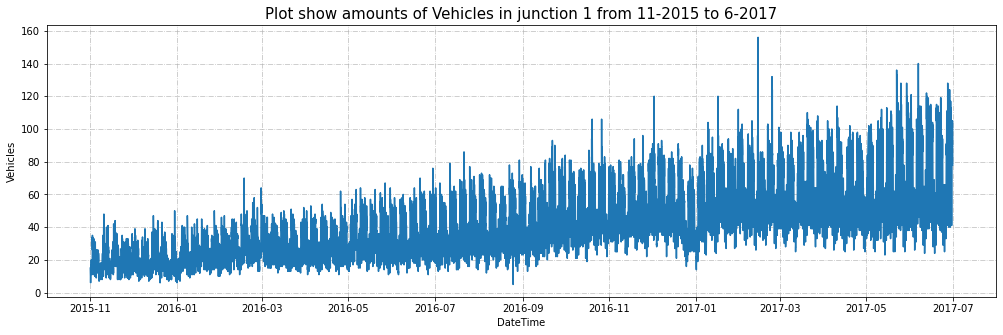

In [32]:
make_time_series_plot(1)

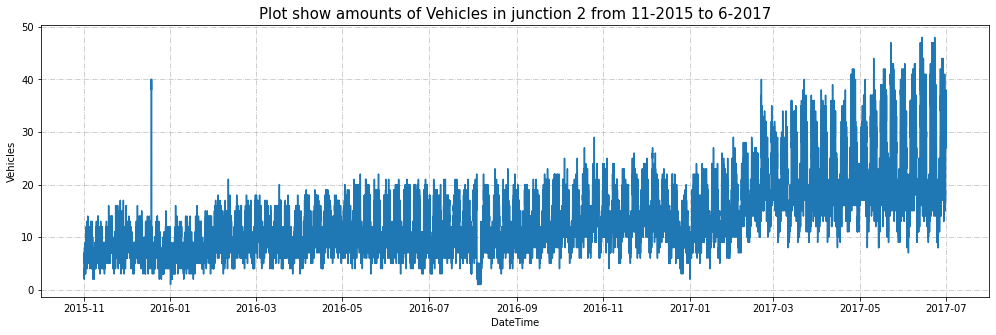

In [33]:
make_time_series_plot(2)

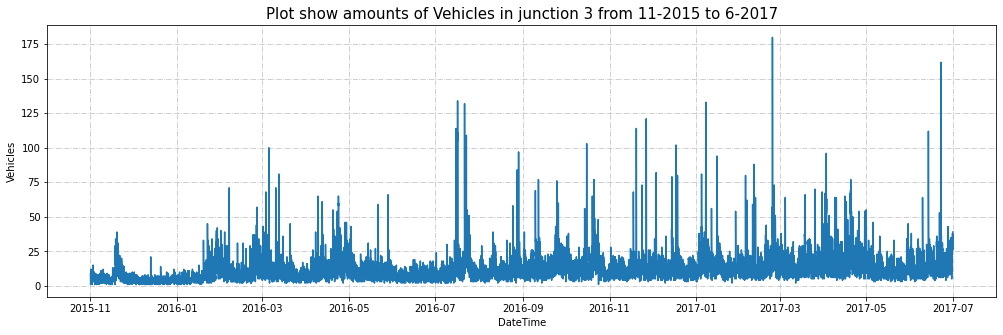

In [34]:
make_time_series_plot(3)

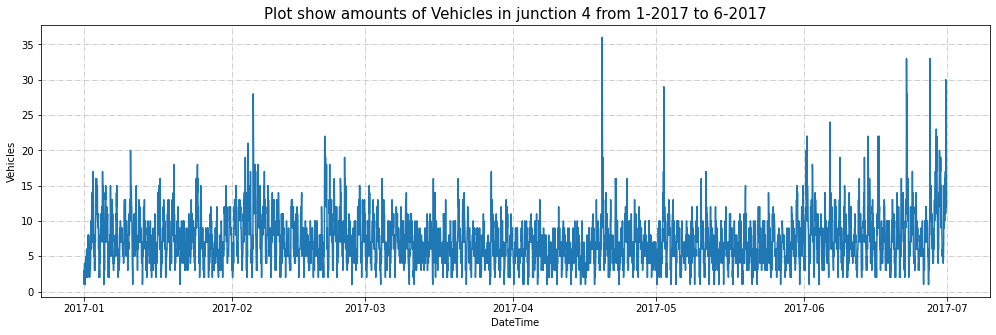

In [35]:
make_time_series_plot(4)

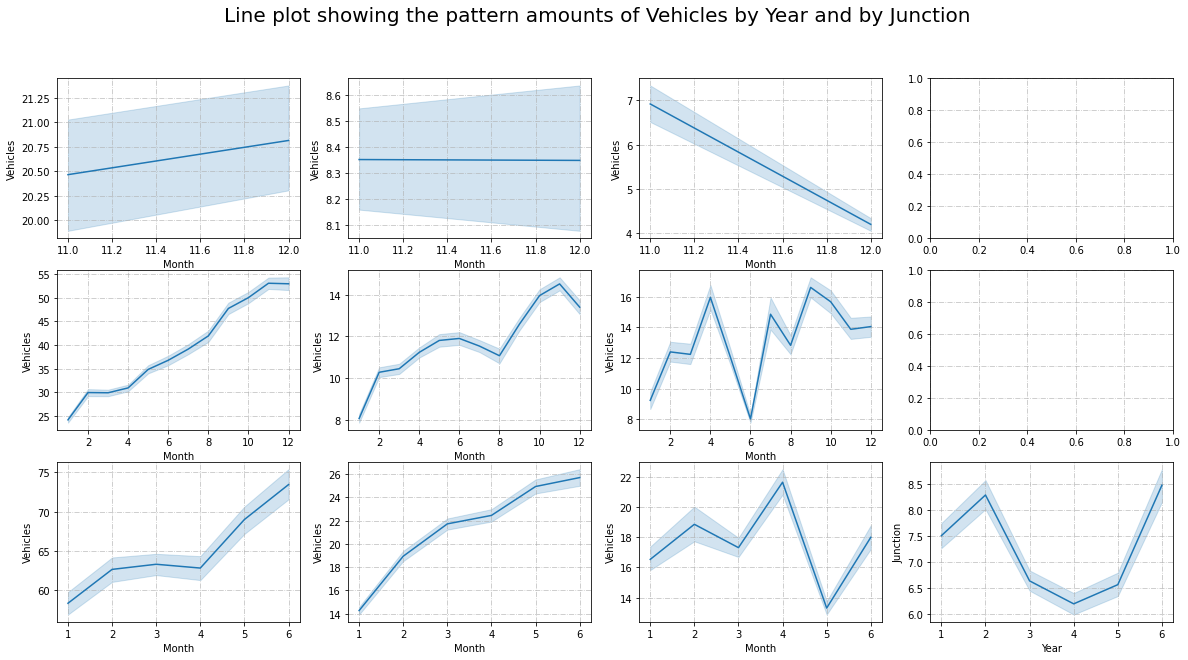

In [36]:
f, ax = plt.subplots(3, 4, figsize=(20, 10))

for i, year in enumerate(range(2015, 2018)):
  for j, junction in enumerate(range(1, 5)):
    sns.lineplot(data=df[(df.Junction == junction) & (df.Year == year)], x='Month', y='Vehicles', ax=ax[i, j])
    ax[i, j].grid(True, alpha=0.75, ls='-.')

plt.xlabel('Year')
plt.ylabel('Junction')
f.suptitle('Line plot showing the pattern amounts of Vehicles by Year and by Junction', fontsize=20)
plt.show()

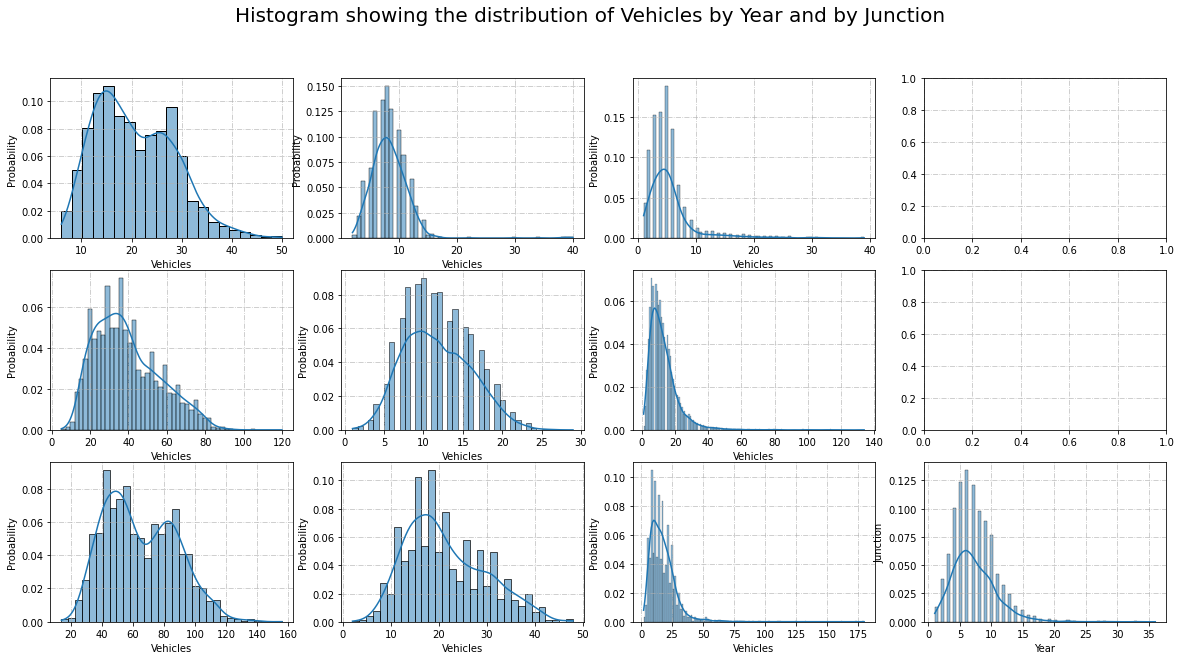

In [37]:
f, axis = plt.subplots(3, 4, figsize=(20, 10))

for i, year in enumerate(range(2015, 2018)):
  for j, junction in enumerate(range(1, 5)):
    sns.histplot(df[(df.Junction == junction) & (df.Year == year)]['Vehicles'], kde=True, ax=axis[i, j], stat='probability')
    axis[i, j].grid(True, alpha=0.75, ls='-.')

plt.xlabel('Year')
plt.ylabel('Junction')
f.suptitle('Histogram showing the distribution of Vehicles by Year and by Junction', fontsize=20)
plt.show()

In [38]:
standardization = lambda x: StandardScaler().fit_transform(x)

In [39]:
z_df = df.copy()
z_df['Vehicles'] = standardization(z_df.Vehicles.values.reshape(-1, 1))
z_df.head()

,Junction,Vehicles,Year,Month,Day,Hour
DateTime,,,,,,
2015-11-01 00:00:00,1,-0.375489,2015,11,1,0
2015-11-01 01:00:00,1,-0.471875,2015,11,1,1
2015-11-01 02:00:00,1,-0.616454,2015,11,1,2
2015-11-01 03:00:00,1,-0.761034,2015,11,1,3
2015-11-01 04:00:00,1,-0.664648,2015,11,1,4


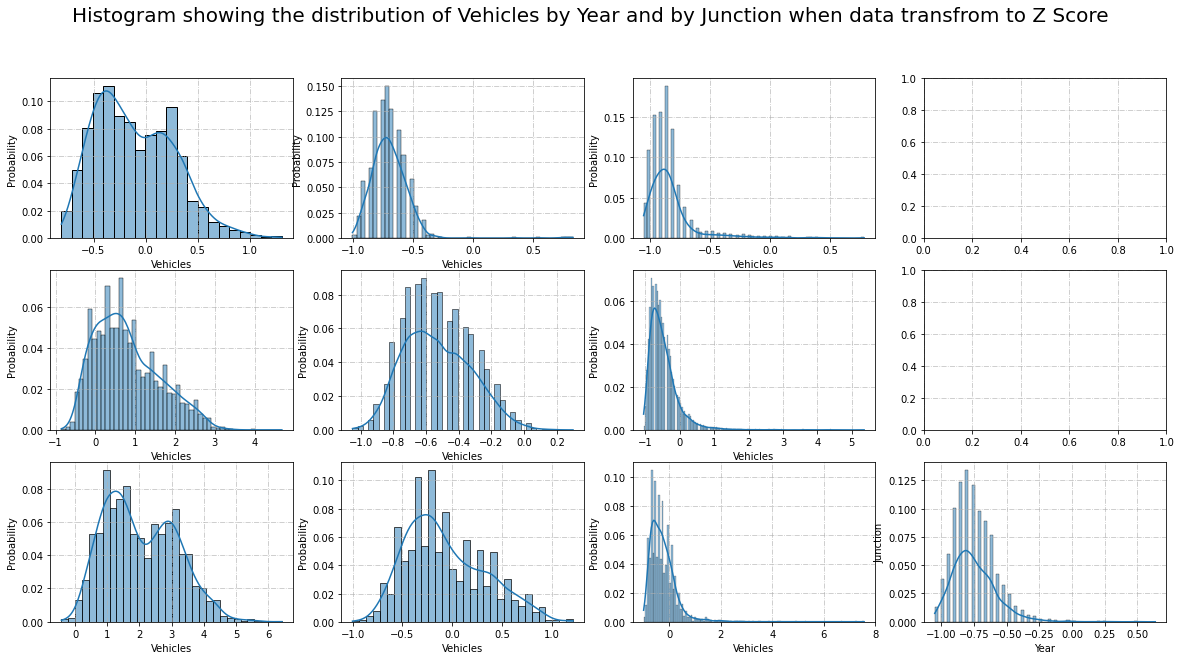

In [40]:
f, axis = plt.subplots(3, 4, figsize=(20, 10))

for i, year in enumerate(range(2015, 2018)):
  for j, junction in enumerate(range(1, 5)):
    sns.histplot(z_df[(z_df.Junction == junction) & (z_df.Year == year)]['Vehicles'], kde=True, ax=axis[i, j], stat='probability')
    axis[i, j].grid(True, alpha=0.75, ls='-.')
    
plt.xlabel('Year')
plt.ylabel('Junction')
f.suptitle('Histogram showing the distribution of Vehicles by Year and by Junction when data transfrom to Z Score', fontsize=20)
plt.show()

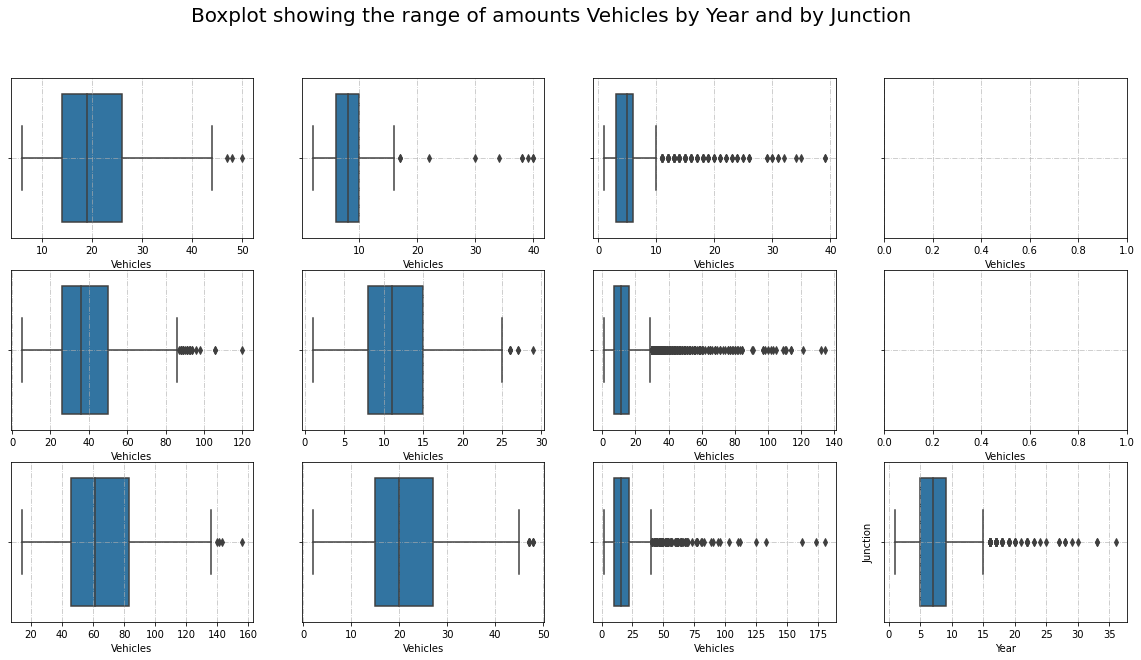

In [41]:
f, axis = plt.subplots(3, 4, figsize=(20, 10))

for i, year in zip(range(3), range(2015, 2018)):
  for j, junction in zip(range(4), range(1, 5)):
    sns.boxplot(x=df[(df.Junction == junction) & (df.Year == year)]['Vehicles'], ax=axis[i, j])
    axis[i, j].grid(True, alpha=0.75, ls='-.')

plt.xlabel('Year')
plt.ylabel('Junction')
f.suptitle('Boxplot showing the range of amounts Vehicles by Year and by Junction', fontsize=20)
plt.show()

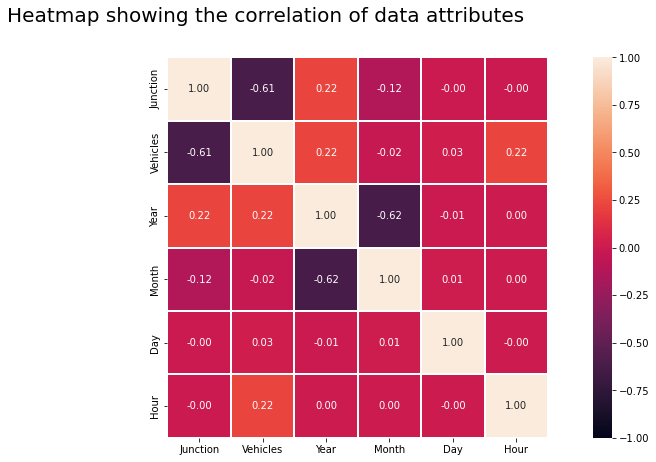

In [42]:
corr = df.corr()
f, ax = plt.subplots(figsize=(16, 7))
sns.heatmap(corr, annot=True, fmt='.2f', vmin=-1, vmax=1, square=True, linewidths=1)
f.suptitle('Heatmap showing the correlation of data attributes', fontsize=20)
plt.show()

In [43]:
def get_list_data(dataf, drop=[]):
  # drop cột DateTime ở các data
  for i in drop:
    try:
      dataf.drop(drop, axis=1, inplace=True)
    except:
      print(f"{i} doesn't has in data")
  # create a list of dataframe has the data in that junction and remove the junction identify
  dataf = [dataf[dataf.Junction == i].drop('Junction', axis=1) for i in range(5)]
  return dataf

In [44]:
data = get_list_data(df)
for i in data:
    print(i.head(1))

Empty DataFrame
Columns: [Vehicles, Year, Month, Day, Hour]
Index: []
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01        15  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01         6  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01         9  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2017-01-01         3  2017      1    1     0


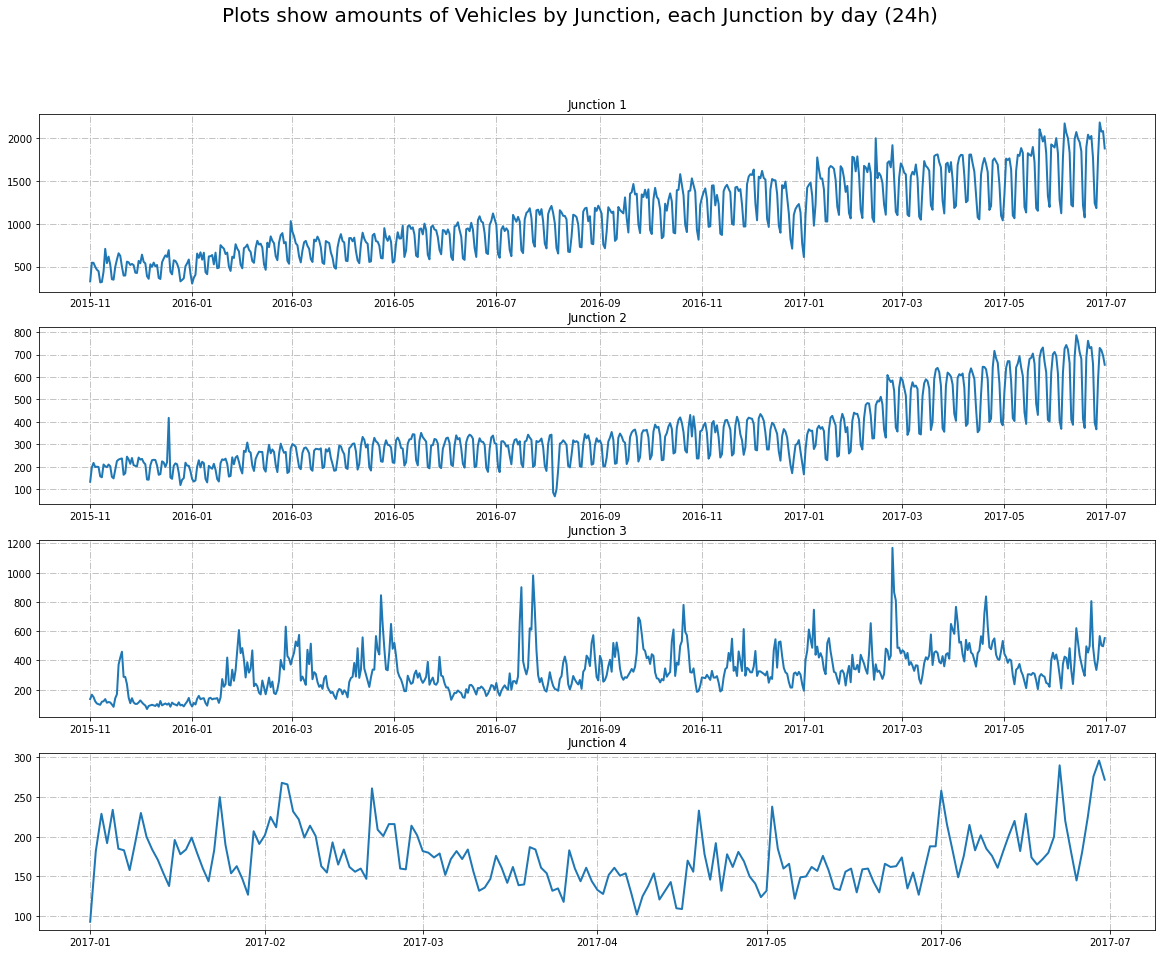

In [45]:
f, ax = plt.subplots(nrows=4, figsize=(20, 15))
for i in range(4):
    ax[i].plot(data[i + 1].resample('D').sum().Vehicles, label=f'Vehicles of {i + 1} Junction', lw=2)
    ax[i].grid(True, alpha=0.75, lw=1, ls='-.')
    ax[i].set_title(f'Junction {i + 1}')
f.suptitle('Plots show amounts of Vehicles by Junction, each Junction by day (24h)', fontsize=20);



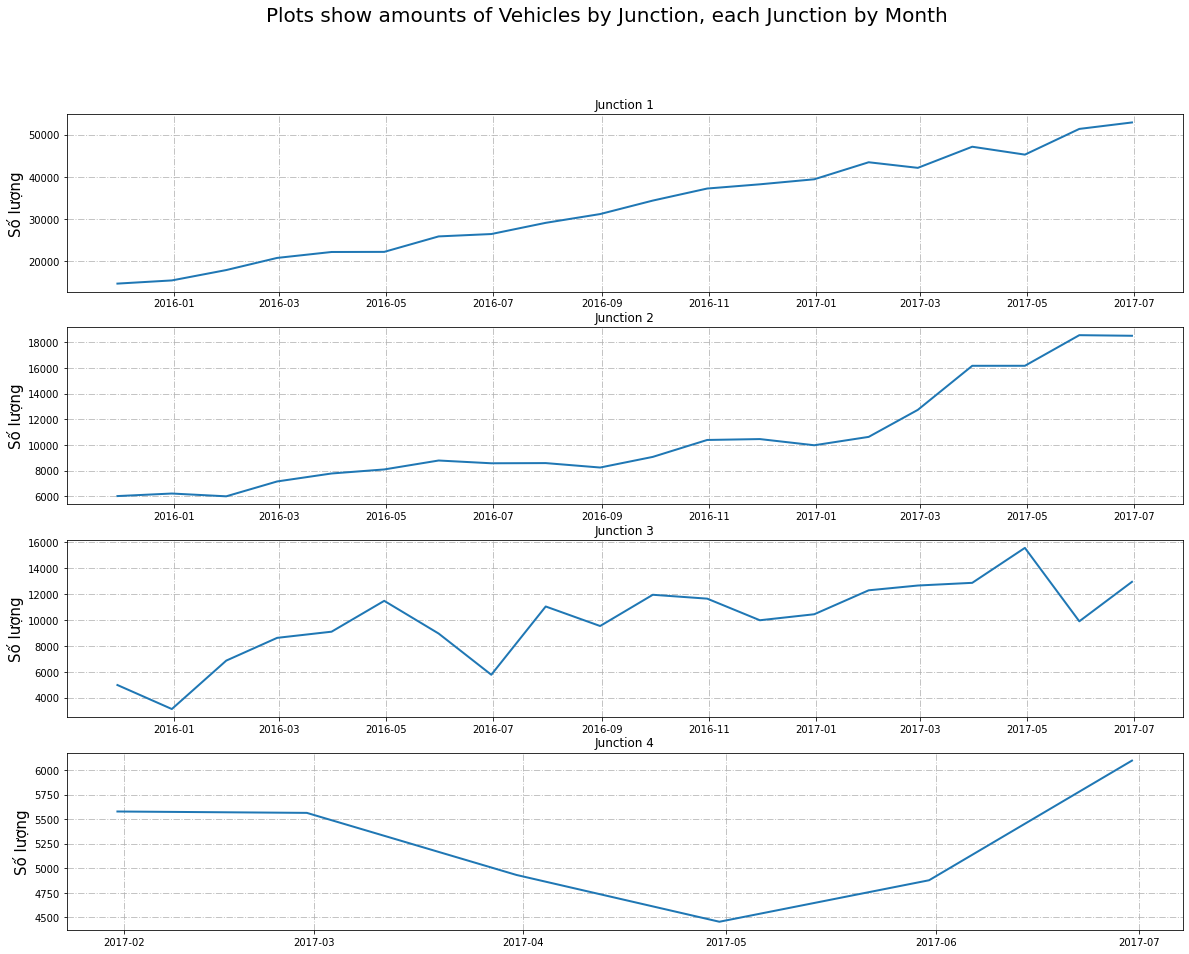

In [46]:
f, ax = plt.subplots(nrows=4, figsize=(20, 15))
for i in range(4):
    ax[i].plot(data[i + 1].resample('M').sum().Vehicles, label=f'Vehicles of {i + 1} Junction', lw=2)
    ax[i].grid(True, alpha=0.75, lw=1, ls='-.')
    ax[i].set_ylabel('Số lượng', fontsize=15)
    ax[i].set_title(f'Junction {i + 1}')
f.suptitle('Plots show amounts of Vehicles by Junction, each Junction by Month', fontsize=20);

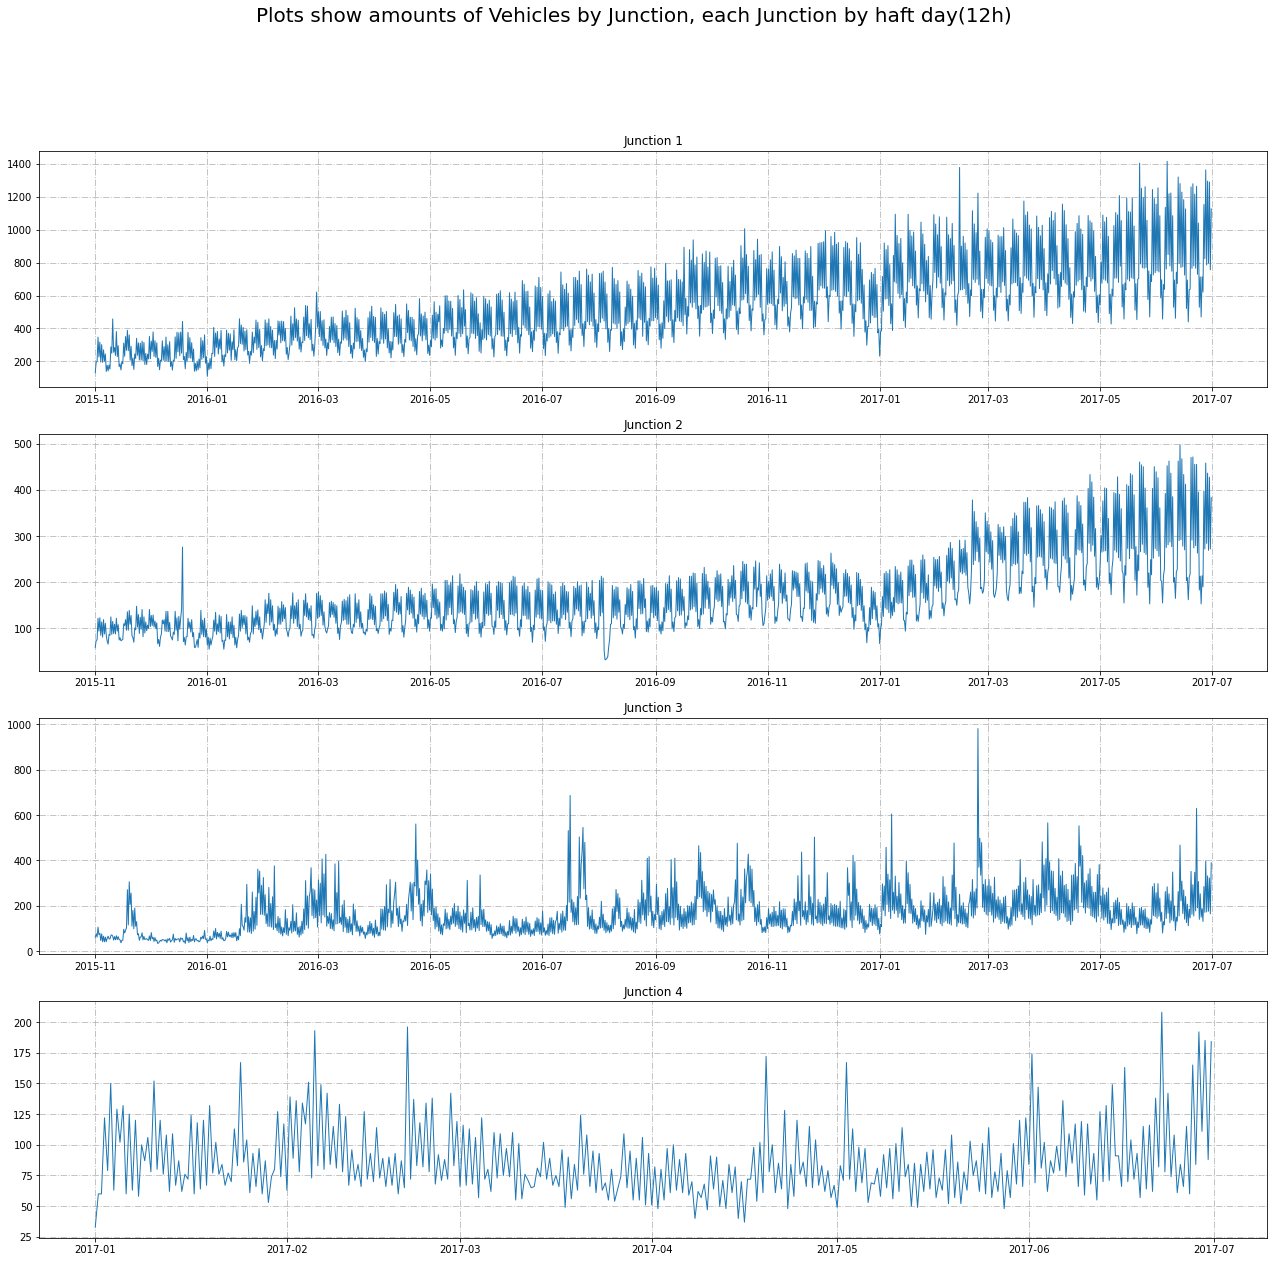

In [47]:
f, ax = plt.subplots(nrows=4, figsize=(22, 20))
for i in range(4):
    ax[i].plot(data[i + 1].resample('12H').sum().Vehicles, label=f'Vehicles of {i + 1} Junction', lw=1)
    ax[i].grid(True, alpha=0.75, lw=1, ls='-.')
    ax[i].set_title(f'Junction {i + 1}')
f.suptitle('Plots show amounts of Vehicles by Junction, each Junction by haft day(12h)', fontsize=20);

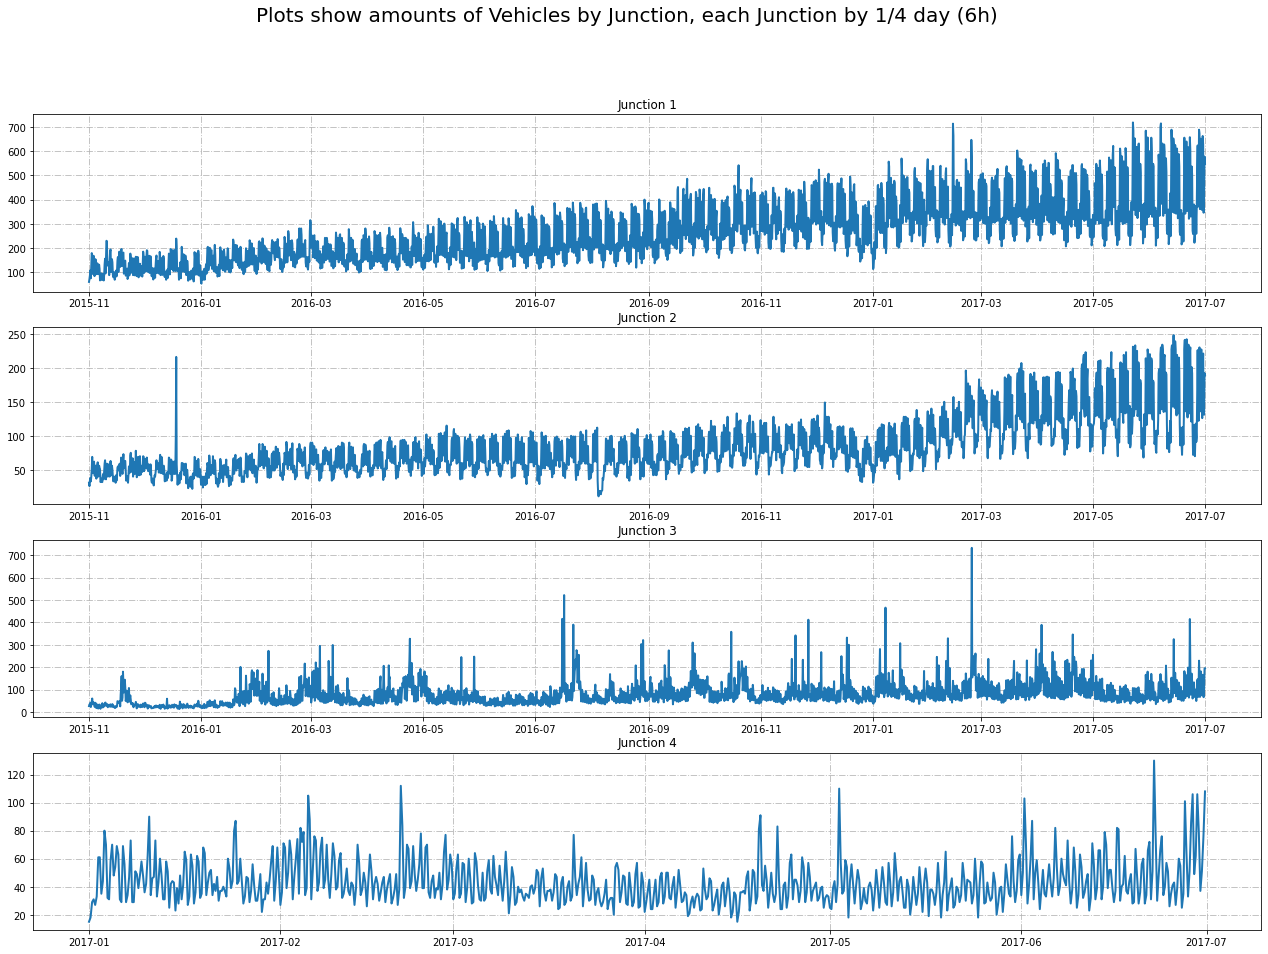

In [48]:
f, ax = plt.subplots(nrows=4, figsize=(22, 15))
for i in range(4):
    ax[i].plot(data[i + 1].resample('6H').sum().Vehicles, label=f'Vehicles of {i + 1} Junction', lw=2)
    ax[i].grid(True, alpha=0.75, lw=1, ls='-.')
    ax[i].set_title(f'Junction {i + 1}')
f.suptitle('Plots show amounts of Vehicles by Junction, each Junction by 1/4 day (6h)', fontsize=20);

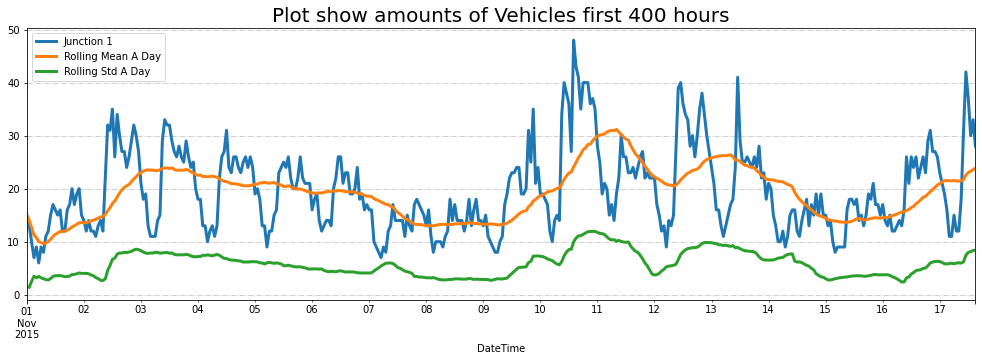

In [49]:
f, ax = plt.subplots(figsize=(17, 5))
foo = data[1][:400]
foo.Vehicles.plot(lw=3)
foo.Vehicles.rolling('D').mean().plot(lw=3)
foo.Vehicles.rolling('D').std().plot(lw=3)
plt.legend(['Junction 1', 'Rolling Mean A Day', 'Rolling Std A Day'])
plt.grid(True, alpha=0.75, ls='-.')
plt.title('Plot show amounts of Vehicles first 400 hours', fontsize=20)
plt.show()

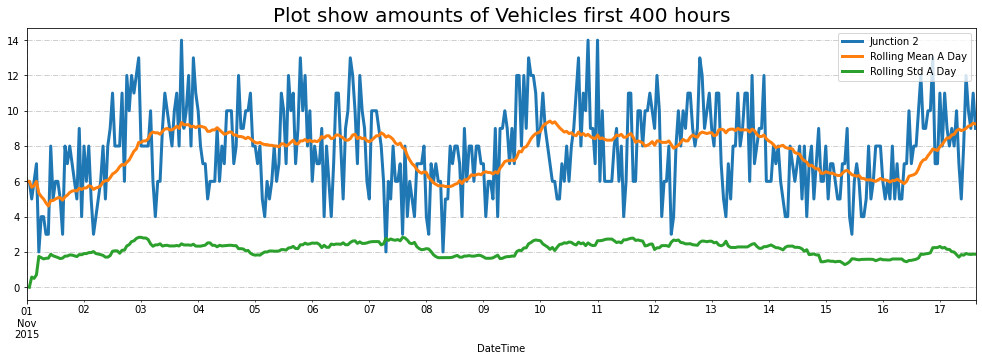

In [50]:
f, ax = plt.subplots(figsize=(17, 5))
foo = data[2][:400]
foo.Vehicles.plot(lw=3)
foo.Vehicles.rolling('D').mean().plot(lw=3)
foo.Vehicles.rolling('D').std().plot(lw=3)
plt.legend(['Junction 2', 'Rolling Mean A Day', 'Rolling Std A Day'])
plt.grid(True, alpha=0.75, ls='-.')
plt.title('Plot show amounts of Vehicles first 400 hours', fontsize=20)
plt.show()

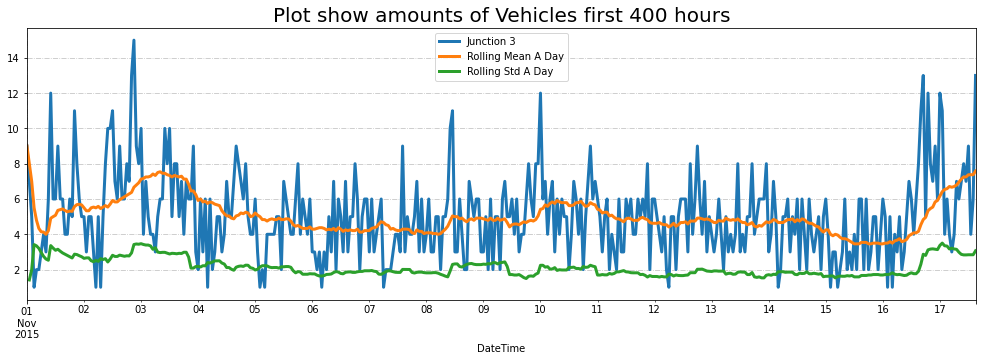

In [51]:
f, ax = plt.subplots(figsize=(17, 5))
foo = data[3][:400]
foo.Vehicles.plot(lw=3)
foo.Vehicles.rolling('D').mean().plot(lw=3)
foo.Vehicles.rolling('D').std().plot(lw=3)
plt.legend(['Junction 3', 'Rolling Mean A Day', 'Rolling Std A Day'])
plt.grid(True, alpha=0.75, ls='-.')
plt.title('Plot show amounts of Vehicles first 400 hours', fontsize=20)
plt.show()

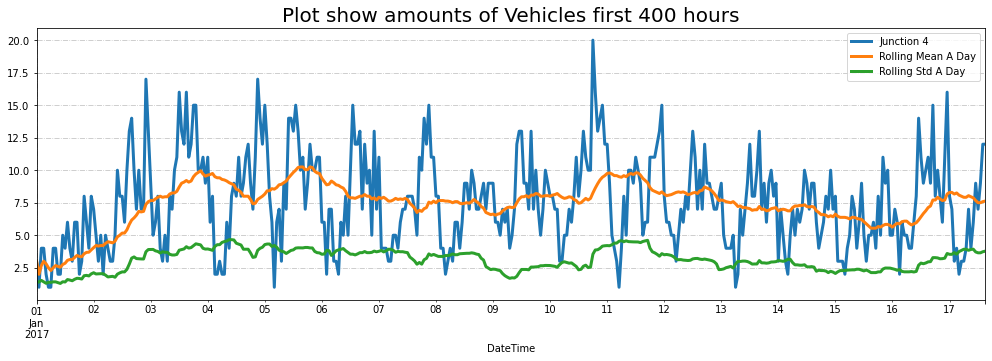

In [52]:
f, ax = plt.subplots(figsize=(17, 5))
foo = data[4][:400]
foo.Vehicles.plot(lw=3)
foo.Vehicles.rolling('D').mean().plot(lw=3)
foo.Vehicles.rolling('D').std().plot(lw=3)
plt.legend(['Junction 4', 'Rolling Mean A Day', 'Rolling Std A Day'])
plt.grid(True, alpha=0.75, ls='-.')
plt.title('Plot show amounts of Vehicles first 400 hours', fontsize=20)
plt.show()

Auto Corelation Plot


In [53]:
def make_autocorrelation(junction=1):
    f, ax = plt.subplots(figsize=(17, 6), nrows=2)
    plot_acf(data[junction].Vehicles, title=f"Autocorrelation of amounts of Vehicles in Junction {junction}", ax=ax[0])
    plot_pacf(data[junction].Vehicles, title=f"Partial Autocorrelation of amounts of Vehicles Junction {junction}", ax=ax[1])
    plt.show()

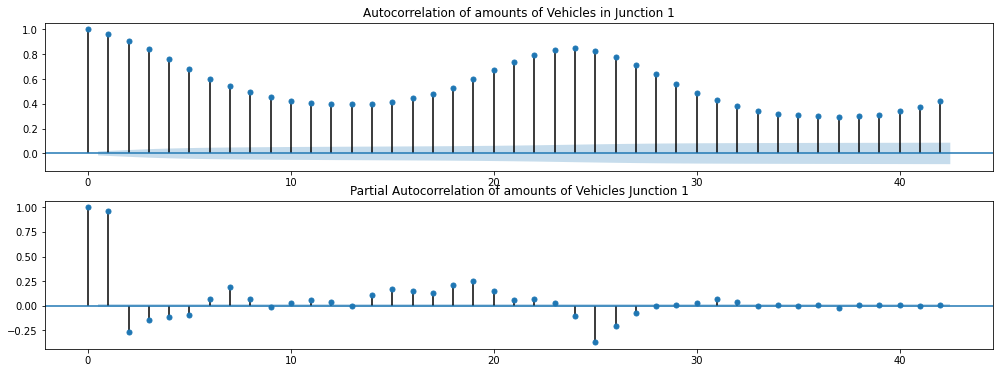

In [54]:
make_autocorrelation(1)

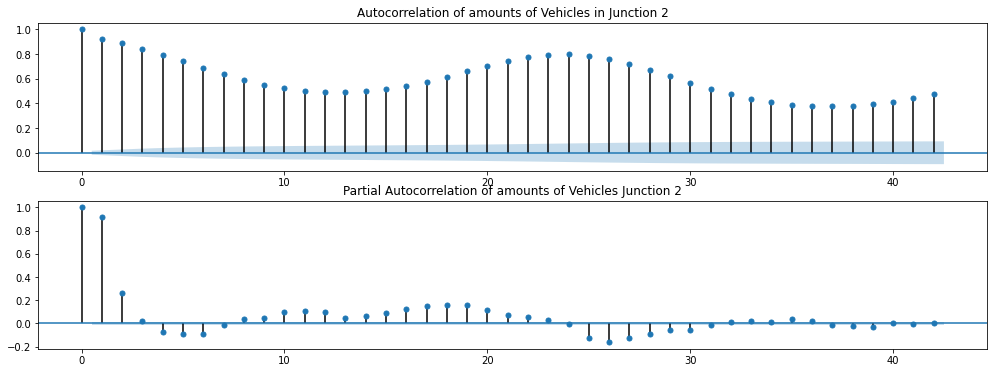

In [55]:
make_autocorrelation(2)

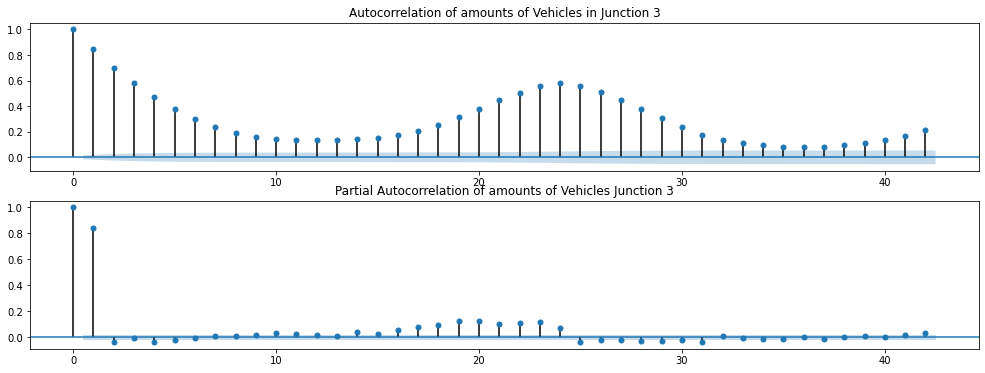

In [56]:


make_autocorrelation(3)



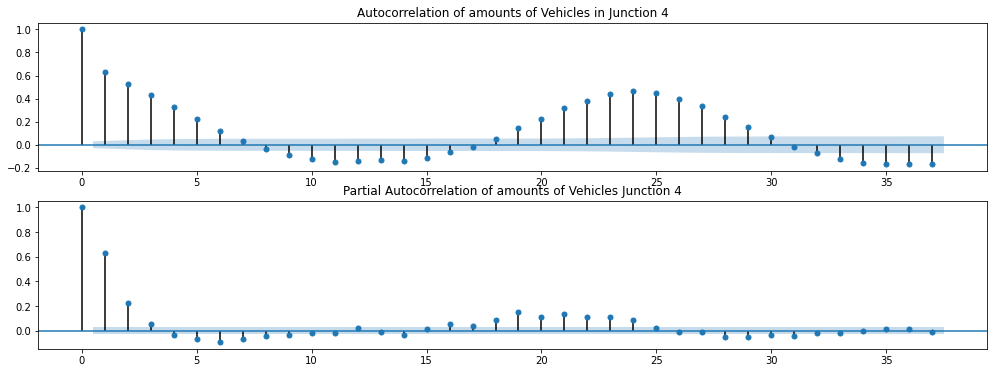

In [57]:


make_autocorrelation(4)



    Month has negative correlation with Year
    The correlation of Vehicles and Year is equal to Vehicles and Hour

=> Can drop Year or Hour because it's the same


**Modeling**

In [58]:
def make_metrics(models):
    data = {
        'name': [model.name for model in models[1:]],
        'r2': [model.r2 for model in models[1:]],
        'rmse': [model.rmse for model in models[1:]]
    }
    data['name'] = 'average R2 and sum RMSE'
    data['r2'].append(np.mean(data['r2']))
    data['rmse'].append(np.sum(data['rmse']))
    return pd.DataFrame(data)

In [59]:
#create new dataset

z_data = get_list_data(z_df)
for i in z_data:
    print(i.head(1))

Empty DataFrame
Columns: [Vehicles, Year, Month, Day, Hour]
Index: []
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01 -0.375489  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01 -0.809227  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01 -0.664648  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2017-01-01 -0.953806  2017      1    1     0


In [66]:
class Model:
  def __init__(self, name, data, predict_features, test_size, ml_model):
    self.name = name
    self.data = data
    self.predict_features = predict_features
    self.is_trained = False
    self.test_size = test_size
    self.ml_model = ml_model
    self.do_things()

  def cal_rmse(self):
    self.rmse = mean_squared_error(self.ytest, self.ypredict, squared=False)
    return self.rmse

  def prequisite(self, test_size):
    self.features = [i for i in self.data.columns if i != self.predict_features]
    self.X = self.data[self.features].values
    self.y = self.data[self.predict_features].values
    self.Xtrain, self.Xtest, self.ytrain, self.ytest = train_test_split(self.X, self.y, test_size=test_size)
    return None

  def fit(self):
    self.is_trained = True
    self.ml_model.fit(self.Xtrain, self.ytrain)
    self.ypredict = self.ml_model.predict(self.Xtest)
    return self.ml_model

  def cal_r2_score(self):
    self.r2 = r2_score(self.ytest, self.ypredict)
    return self.r2

  def do_things(self) -> None:
    self.prequisite(self.test_size)
    self.fit()
    self.cal_rmse()
    self.cal_r2_score()
    return None

  def feature_importances(self, ax) -> None:
    feature_importances = self.ml_model.feature_importances_
    index = lag_models[1].features
    data = pd.DataFrame(pd.Series(feature_importances, index=index).nlargest(10)).reset_index()
    data.columns = ['Features', 'Value']
    g = sns.barplot(data=data, x='Features', y='Value', ax=ax)
    for p in g.patches:
        ax.annotate(
            format(p.get_height(), '.2f'),
            (p.get_x() + p.get_width() / 2, p.get_height() + 0.02),
            ha='center', va='center', weight='bold', fontsize=9
        )
    ax.set_title(f'Plot of {self.name}', fontsize=12)
    ax.grid(True, ls='-.', alpha=0.7)
    ax.set_ylim(0, 1)

  def __repr__(self) -> str:
    if not self.is_trained:
      return f'<{self.name}> (is not trained yet)>'
    return f'<({self.name}: [R² Score: {self.r2}], [RMSE: {self.rmse}])>'



**Training models for 4 junction with normal data**

In [67]:
models = [None]
for i in range(1, 5):
    models += [
        Model(
            ml_model=RandomForestRegressor(),
            name=f'Dataset of junction {i}',
            data=data[i],
            predict_features='Vehicles',
            test_size=1/4
        )
    ]
    
make_metrics(models)

,name,r2,rmse
0,average R2 and sum RMSE,0.939762,5.561505
1,average R2 and sum RMSE,0.862825,2.728255
2,average R2 and sum RMSE,0.740926,5.128976
3,average R2 and sum RMSE,0.446669,2.607266
4,average R2 and sum RMSE,0.747545,16.026002


**Training models for 4 junction with Z Score Normalization**

In [70]:
z_models = [None]
for i in range(1, 5):
    z_models += [
        Model(
            ml_model=RandomForestRegressor(),
            name=f'Dataset of junction {i}',
            data=z_data[i],
            predict_features='Vehicles',
            test_size=1/4
        )
    ]

make_metrics(z_models)

,name,r2,rmse
0,average R2 and sum RMSE,0.942276,0.263631
1,average R2 and sum RMSE,0.856870,0.136061
2,average R2 and sum RMSE,0.754361,0.250293
3,average R2 and sum RMSE,0.527015,0.118906
4,average R2 and sum RMSE,0.770131,0.768891


**Lag Data**

In [72]:
lag_df = df.copy()
for i in range(1, 3):
    lag_df[f'Vehicles_lag_{i}'] = df.Vehicles.shift(i)

# drop all rows with nan, because lag data cause nan
lag_df.dropna(inplace=True)
lag_df.head()

,Junction,Vehicles,Year,Month,Day,Hour,Vehicles_lag_1,Vehicles_lag_2
DateTime,,,,,,,,
2015-11-01 02:00:00,1,10,2015,11,1,2,13.0,15.0
2015-11-01 03:00:00,1,7,2015,11,1,3,10.0,13.0
2015-11-01 04:00:00,1,9,2015,11,1,4,7.0,10.0
2015-11-01 05:00:00,1,6,2015,11,1,5,9.0,7.0
2015-11-01 06:00:00,1,9,2015,11,1,6,6.0,9.0


In [73]:
lag_data = get_list_data(lag_df, drop=['Year'])
for i in lag_data:
    print(i.head(1))

Empty DataFrame
Columns: [Vehicles, Month, Day, Hour, Vehicles_lag_1, Vehicles_lag_2]
Index: []
                     Vehicles  Month  Day  Hour  Vehicles_lag_1  \
DateTime                                                          
2015-11-01 02:00:00        10     11    1     2            13.0   

                     Vehicles_lag_2  
DateTime                             
2015-11-01 02:00:00            15.0  
            Vehicles  Month  Day  Hour  Vehicles_lag_1  Vehicles_lag_2
DateTime                                                              
2015-11-01         6     11    1     0            78.0            84.0
            Vehicles  Month  Day  Hour  Vehicles_lag_1  Vehicles_lag_2
DateTime                                                              
2015-11-01         9     11    1     0            27.0            29.0
            Vehicles  Month  Day  Hour  Vehicles_lag_1  Vehicles_lag_2
DateTime                                                              
2017-01-01         3



Lag data is appropriate for time series data, use for create the auto correlation


In [74]:
lag_models = [None]
for i in range(1, 5):
    lag_models += [
        Model(
            ml_model=RandomForestRegressor(),
            name=f'Dataset of junction {i} with lag data',
            data=lag_data[i],
            predict_features='Vehicles',
            test_size=1/3
        )
    ]

make_metrics(lag_models)

,name,r2,rmse
0,average R2 and sum RMSE,0.967132,4.123409
1,average R2 and sum RMSE,0.883482,2.570252
2,average R2 and sum RMSE,0.731040,5.657677
3,average R2 and sum RMSE,0.479589,2.767980
4,average R2 and sum RMSE,0.765311,15.119317


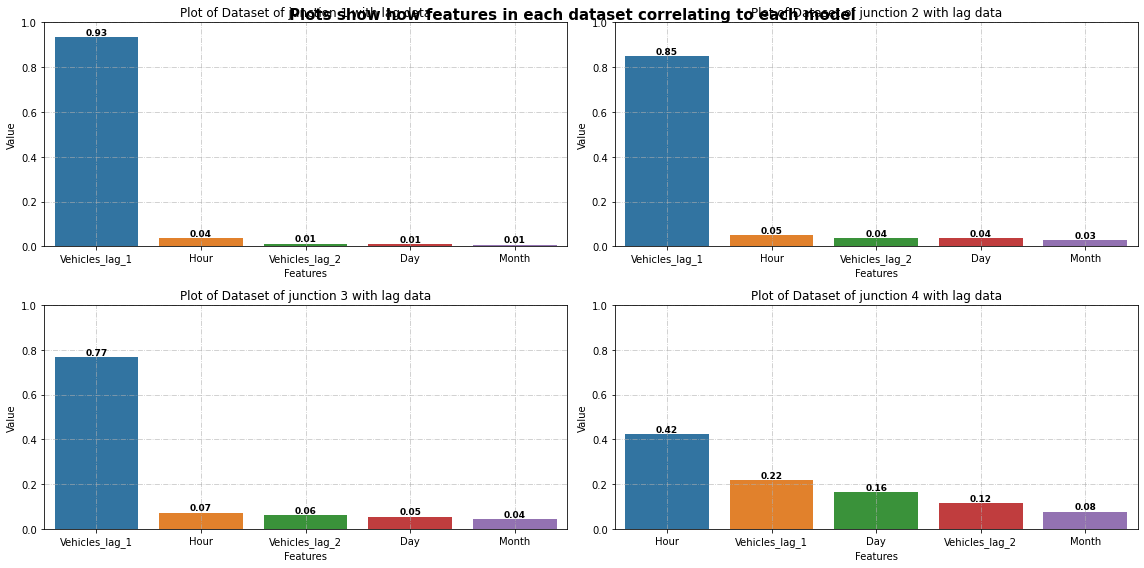

In [75]:


f, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
k = 1
for i in range(2):
    for j in range(2):
        lag_models[k].feature_importances(ax[i, j])
        k += 1
f.suptitle('Plots show how features in each dataset correlating to each model', fontsize=15, fontweight='bold')        
f.tight_layout()



Predict 4 next moths

In [77]:
for junction in range(1, 5):
    cur_time = lag_data[junction].tail(1).index[0] # get the current time, the last time of that dataset
    end_time = pd.Timestamp(2017, 11, 1, 0, 0, 0) # the end time after 4 months that we want to predict
    new_data = lag_data[junction].copy() # create a copy of dataset with that junction
    features = lag_models[junction].features # get features of each models in that junction
    while cur_time != end_time:
        last = new_data.tail(1).copy() # get the last row of dataset, just make a copy!
        new_data = pd.concat([new_data, last]) # concatenate the copy dataset with it's last row
        for i in range(1, 3): # create lag data
            new_data[f'Vehicles_lag_{i}'] = new_data.Vehicles.shift(i) # shift by periods i
        new_data.iloc[len(new_data) - 1, [1, 2, 3]] = [cur_time.month, cur_time.day, cur_time.hour] # assign value for those columns
        last = new_data[features].tail(1).values # create a new last data that drop all nan
        new_data.iloc[len(new_data) - 1, 0] = round(lag_models[1].ml_model.predict(last)[0]) # predicting for vehicles
        cur_time += timedelta(hours=1) # add to a cur_time 1 hour
    new_data.index = pd.date_range(
        start=lag_data[junction].head(1).index.values[0],
        end=pd.Timestamp(2017, 11, 1, 0, 0, 0),
        freq='H'
    ) # reassign index with the new time range with start is the start of data
      # and end time is the end time that initialize in start of the loop
    new_data.to_csv(f'vehicles_for_next_4_months_in_junction_{junction}.csv') # to csv that file
    print(f'|==Predicted for Junction {junction}==|')

|==Predicted for Junction 1==|
|==Predicted for Junction 2==|
|==Predicted for Junction 3==|
|==Predicted for Junction 4==|


In [78]:
# Read CSV file into a DataFrame
df_pj1 = pd.read_csv('/content/vehicles_for_next_4_months_in_junction_1.csv')

# Print first few rows of the DataFrame
print(df_pj1.head())


            Unnamed: 0  Vehicles  Month  Day  Hour  Vehicles_lag_1  \
0  2015-11-01 02:00:00        10     11    1     2             NaN   
1  2015-11-01 03:00:00         7     11    1     3            10.0   
2  2015-11-01 04:00:00         9     11    1     4             7.0   
3  2015-11-01 05:00:00         6     11    1     5             9.0   
4  2015-11-01 06:00:00         9     11    1     6             6.0   

   Vehicles_lag_2  
0             NaN  
1             NaN  
2            10.0  
3             7.0  
4             9.0  


In [ ]:
f, ax = plt.subplots(nrows=4, figsize=(20, 15))
for i in range(4):
    ax[i].plot(data[i + 1].resample('M').sum().Vehicles, label=f'Vehicles of {i + 1} Junction', lw=2)
    ax[i].grid(True, alpha=0.75, lw=1, ls='-.')
    ax[i].set_ylabel('Số lượng', fontsize=15)
    ax[i].set_title(f'Junction {i + 1}')
f.suptitle('Plots show amounts of Vehicles by Junction, each Junction by Month', fontsize=20);